### Code for generation of Figure 3
_Single cell trajectory mapping of human pluripotent stem cells differentiating towards lung and hepatocyte progenitors_,
bioArxiv Preprint. <br> 
Chaido Ori, Meshal Ansari, Ilias Angelidis, Fabian J. Theis, Herbert B. Schiller and Micha Drukker

In [1]:
## This Noteboook generates Diffusion Maps and Feature Plots in Figure 3 in Ori et al., 2021
## It is based on subsets generated in generate_subsets.ipynb

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import IPython
from natsort import natsorted

In [2]:
## Colour Map for time points
from matplotlib import colors

cmaplist = ["black", "purple", "darkblue", "cornflowerblue", "lightsteelblue",
            "red", "sandybrown", "gold", "peachpuff"] 
cm = colors.LinearSegmentedColormap.from_list("grouping", cmaplist, N = 11)
cols = [cm(i) for i in range(11)]

### Figure 3 a, e - Read in subsets and plot diffusion map for each stage

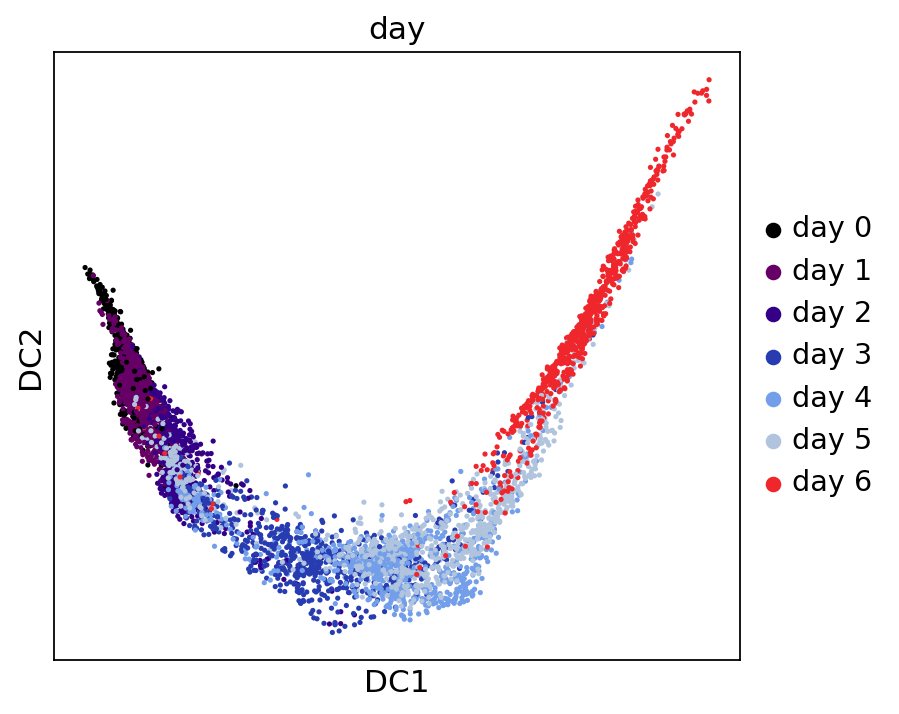

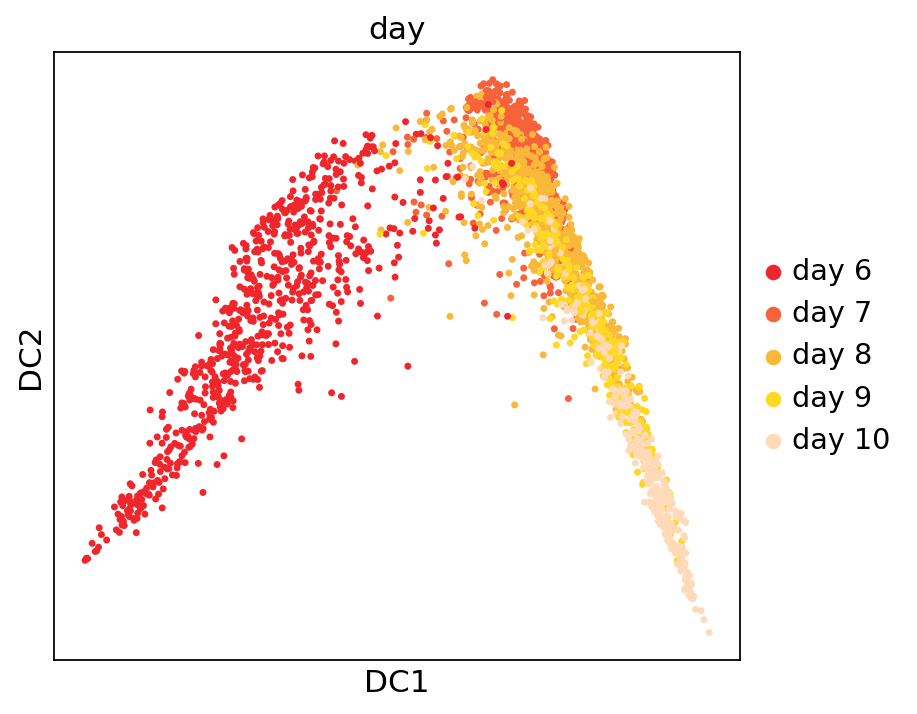

In [3]:
IPython.display.set_matplotlib_formats("png2x", quality = 90)
plt.rcParams["figure.figsize"] = (5.5, 5)
folder = "/20200806_Drukker_IPSlungProgenitors_meshal.ansari/"

## Definite Endoderm
de = sc.read(folder + "IPS_lung_differentiation_defendo.h5ad")
sc.pl.diffmap(de, color = ["day"], palette = cols[:7])

## Foregut Endoderm + day 6
fe = sc.read(folder + "IPS_lung_differentiation_forendo.h5ad")
sc.pl.diffmap(fe, color = ["day"], palette = cols[6:])

### Figure 3 b - Highlight cells expressing genes of interest in de stage

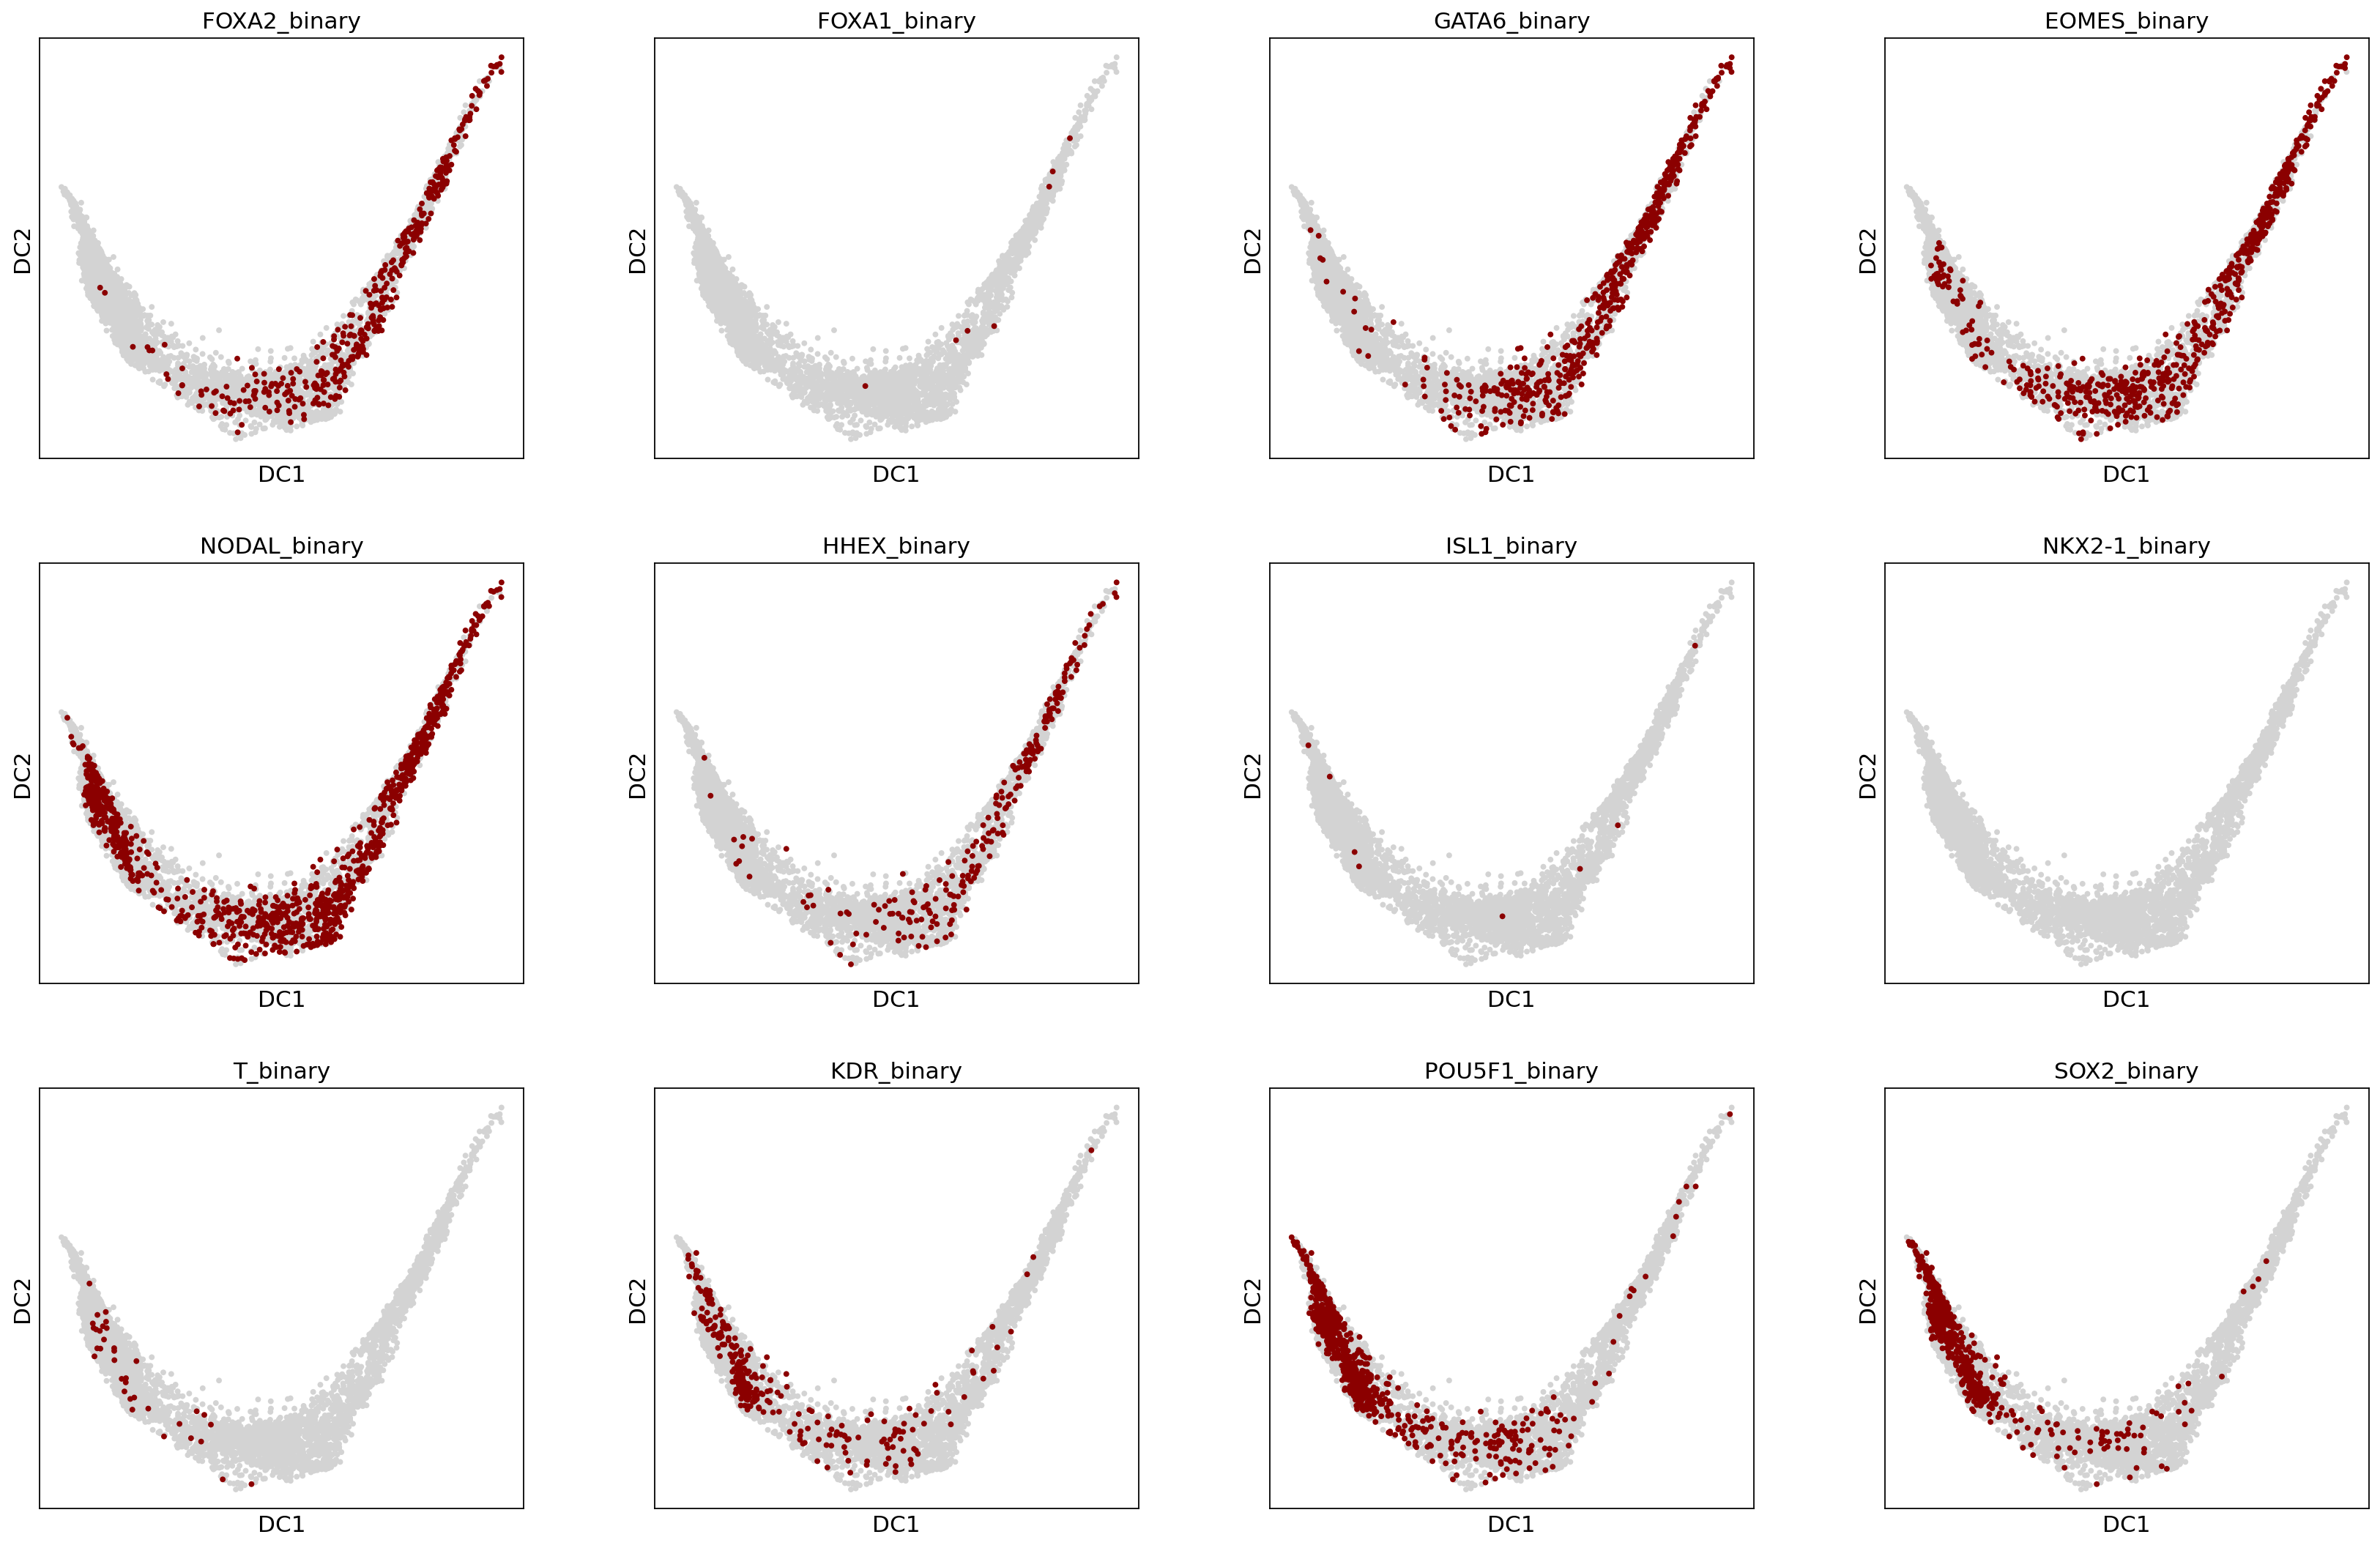

In [4]:
genes = ["FOXA2", "FOXA1", "GATA6", "EOMES", "NODAL", "HHEX", "ISL1", "NKX2-1", "T", "KDR", "POU5F1", "SOX2"]
genes_plot = []

for gene in genes:
    de.obs["%s_binary" %gene] = de.raw.X[:, np.where(de.var_names == gene)[0]].todense() > 0
    c = de.obs["%s_binary" %gene].astype("U")
    de.obs["%s_binary" %gene] = pd.Categorical(c, categories = natsorted(np.unique(c)))
    genes_plot.append("%s_binary" %gene)

sc.pl.diffmap(de, color = genes_plot, palette = ["lightgray", "darkred"], groups = ["True"],
              size = 50, legend_loc = None)

### Figure 3 f - Highlight cells expressing genes of interest in fe stage

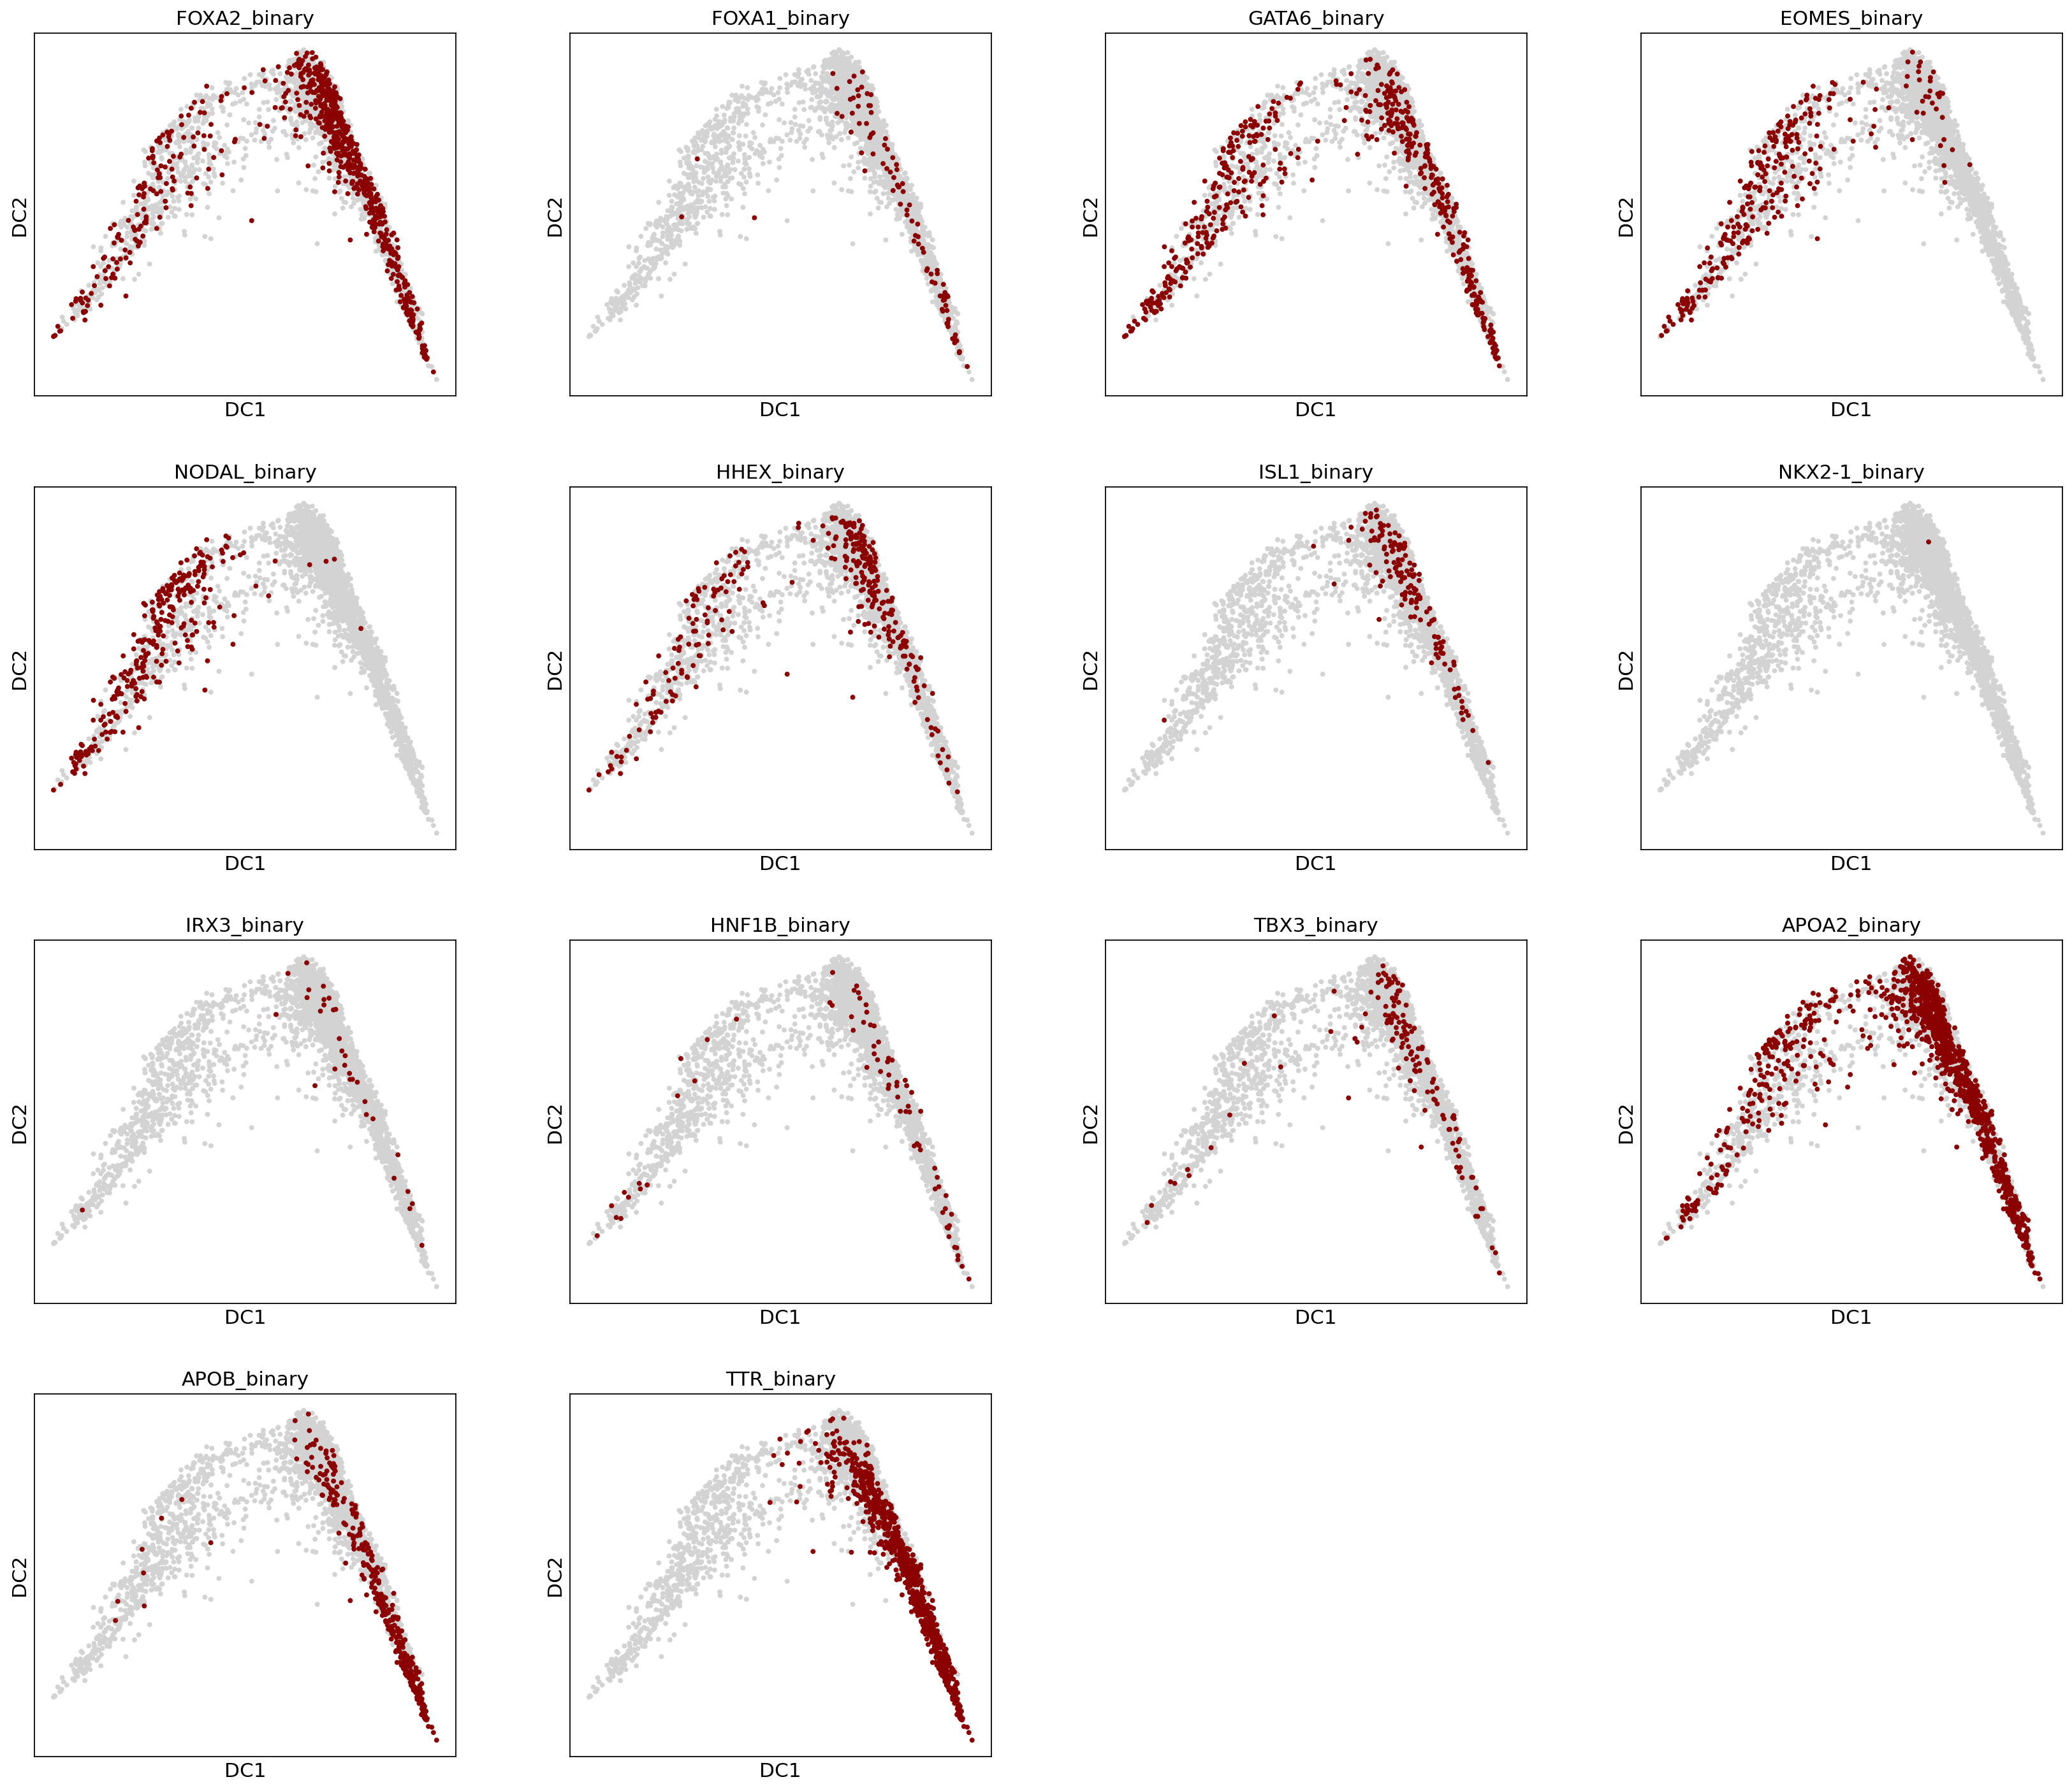

In [5]:
genes = ["FOXA2", "FOXA1", "GATA6", "EOMES", "NODAL", "HHEX", "ISL1",
         "NKX2-1", "IRX3", "HNF1B", "TBX3", "APOA2", "APOB", "TTR"]
genes_plot = []

for gene in genes:
    fe.obs["%s_binary" %gene] = fe.raw.X[:, np.where(fe.var_names == gene)[0]].todense() > 0
    c = fe.obs["%s_binary" %gene].astype("U")
    fe.obs["%s_binary" %gene] = pd.Categorical(c, categories = natsorted(np.unique(c)))
    genes_plot.append("%s_binary" %gene)

sc.pl.diffmap(fe, color = genes_plot, palette = ["lightgray", "darkred"], groups = ["True"],
              size = 50, legend_loc = None)